# Praca Domowa 4

## Jakub Jung



### Apartments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from dalex.datasets import load_apartments
apartments = load_apartments()
apartments.head()

,m2_price,construction_year,surface,floor,no_rooms,district
1,5897,1953,25,3,1,Srodmiescie
2,1818,1992,143,9,5,Bielany
3,3643,1937,56,1,2,Praga
4,3517,1995,93,7,3,Ochota
5,3013,1992,144,6,5,Mokotow


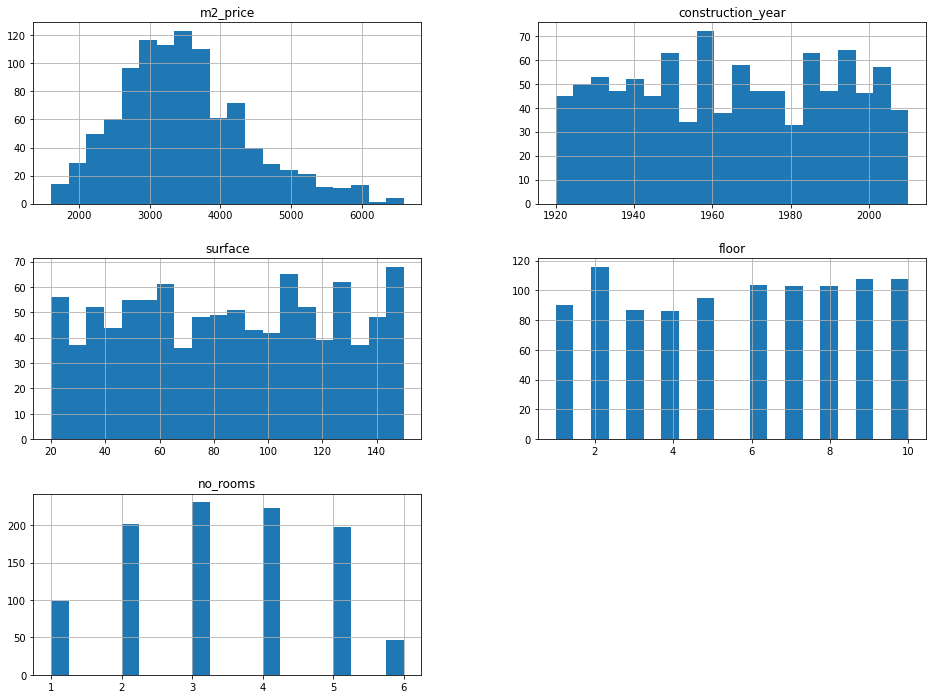

In [4]:
apartments.hist(figsize=(16, 12), bins=20)
plt.show()

In [5]:
apartments['district'].value_counts()

Mokotow        107
Wola           106
Ursus          105
Ursynow        103
Srodmiescie    100
Bemowo          98
Zoliborz        97
Ochota          96
Bielany         96
Praga           92
Name: district, dtype: int64

In [6]:
apartments = pd.get_dummies(data = apartments, columns = ["district"])
apartments

,m2_price,construction_year,surface,floor,no_rooms,district_Bemowo,district_Bielany,district_Mokotow,district_Ochota,district_Praga,district_Srodmiescie,district_Ursus,district_Ursynow,district_Wola,district_Zoliborz
1,5897,1953,25,3,1,0,0,0,0,0,1,0,0,0,0
2,1818,1992,143,9,5,0,1,0,0,0,0,0,0,0,0
3,3643,1937,56,1,2,0,0,0,0,1,0,0,0,0,0
4,3517,1995,93,7,3,0,0,0,1,0,0,0,0,0,0
5,3013,1992,144,6,5,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,6355,1921,44,2,2,0,0,0,0,0,1,0,0,0,0
997,3422,1921,48,10,2,1,0,0,0,0,0,0,0,0,0
998,3098,1980,85,3,3,1,0,0,0,0,0,0,0,0,0
999,4192,1942,36,7,1,0,0,0,0,0,0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split

X_apartments_train, X_apartments_test, y_apartments_train, y_apartments_test = train_test_split(
    apartments.drop(columns=['m2_price']), apartments['m2_price'], test_size=0.3, random_state=7)

In [8]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr = SVR()
svr.fit(X_apartments_train, y_apartments_train)
print('MSE (training data):', mean_squared_error(y_apartments_train, svr.predict(X_apartments_train), squared=False))
print('MSE (test data):', mean_squared_error(y_apartments_test, svr.predict(X_apartments_test), squared=False))

MSE (training data): 888.9705754858554
MSE (test data): 957.8563769843038


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr_scaled = make_pipeline(StandardScaler(),
                          SVR())
svr_scaled.fit(X_apartments_train, y_apartments_train)
print('MSE (training data):', mean_squared_error(y_apartments_train, svr_scaled.predict(X_apartments_train), squared=False))
print('MSE (test data):', mean_squared_error(y_apartments_test, svr_scaled.predict(X_apartments_test), squared=False))

MSE (training data): 868.5863174061594
MSE (test data): 937.2219617107729


Po zastosowaniu StandardScaler'a widać małą poprawę otrzymanych predykcji.

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

parameters = {'svr__C': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000, 10000, 10000],
            'svr__gamma': ['scale', 'auto'],
            'svr__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'svr__kernel':['rbf', 'poly']}

svr_random_scaled = RandomizedSearchCV(make_pipeline(StandardScaler(),
                                                          SVR()),
                                param_distributions=parameters, 
                                n_jobs=-1,
                                scoring="neg_mean_squared_error",
                                n_iter=100,
                                cv=5,
                                random_state = 7)
result = svr_random_scaled.fit(X_apartments_train, y_apartments_train)
print(svr_random_scaled.best_params_)
print('MSE (training data):', mean_squared_error(y_apartments_train, svr_random_scaled.predict(X_apartments_train), squared=False))
print('MSE (test data):', mean_squared_error(y_apartments_test, svr_random_scaled.predict(X_apartments_test), squared=False))

{'svr__kernel': 'rbf', 'svr__gamma': 'auto', 'svr__degree': 5, 'svr__C': 1000}
MSE (training data): 142.65331741069818
MSE (test data): 183.79208594197112


Widać bardzo dużą zmianę w otrzymanym MSE w stosunku do modeli bez optymalizacji parametrów.

### Diabetes

In [41]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
X_diabetes = diabetes['data']
y_diabetes = diabetes['target']
print(diabetes.get('DESCR'))

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

Nasze dane są już przeskalowane - sprawdzimy czy dodatkowe zastosowanie StandardScaler'a cokolwiek da.

In [42]:
X_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [38]:
y_diabetes.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

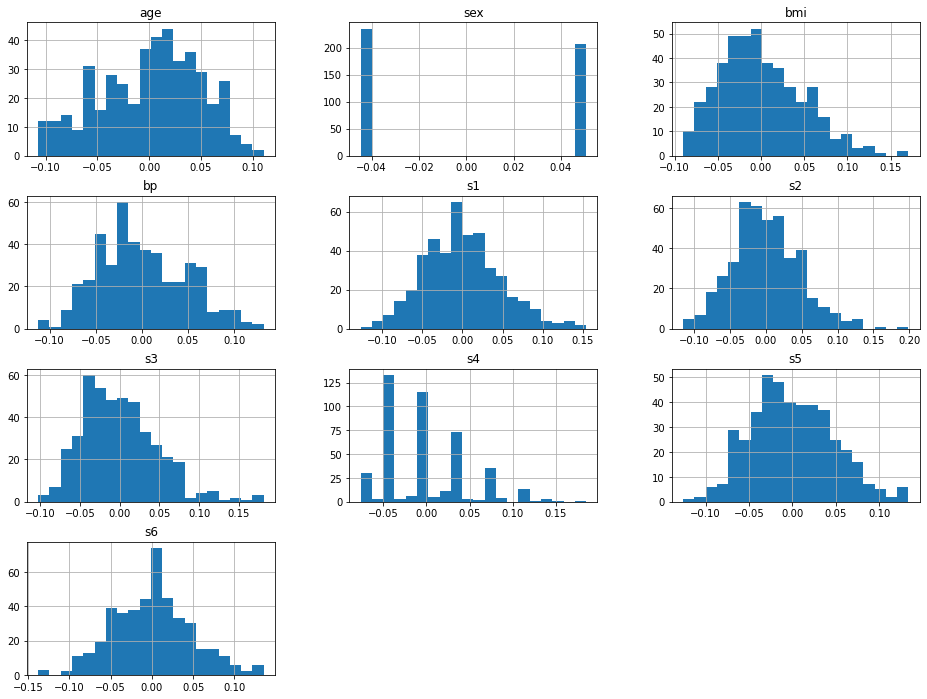

In [44]:
X_diabetes.hist(figsize=(16, 12), bins=20)
plt.show()

In [45]:
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=7)

In [46]:
svr = SVR()
svr.fit(X_diabetes_train, y_diabetes_train)
print('MSE (training data):', mean_squared_error(y_diabetes_train, svr.predict(X_diabetes_train), squared=False))
print('MSE (test data):', mean_squared_error(y_diabetes_test, svr.predict(X_diabetes_test), squared=False))

MSE (training data): 71.34388413650055
MSE (test data): 69.53758559961109


In [47]:
svr_scaled = make_pipeline(StandardScaler(),
                          SVR())
svr_scaled.fit(X_diabetes_train, y_diabetes_train)
print('MSE (training data):', mean_squared_error(y_diabetes_train, svr_scaled.predict(X_diabetes_train), squared=False))
print('MSE (test data):', mean_squared_error(y_diabetes_test, svr_scaled.predict(X_diabetes_test), squared=False))

MSE (training data): 71.33147807316938
MSE (test data): 69.52426307269387


Zgodnie z przewidywaniami - zastosowanie StandardScaler'a na przeskalowanych danych nie miało prawie żadnego efektu.
Co ciekawe, w obu przypadkach otrzymaliśmy lepsze predykcje dla danych testowych niż dla danych treningowych, na których uczył się model.

In [51]:
parameters = {'svr__C': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000, 10000, 10000],
            'svr__gamma': ['scale', 'auto'],
            'svr__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'svr__kernel':['rbf', 'poly']}

svr_random_scaled = RandomizedSearchCV(make_pipeline(SVR()),
                                param_distributions=parameters, 
                                n_jobs=-1,
                                scoring="neg_mean_squared_error",
                                n_iter=100,
                                cv=5,
                                random_state = 7)
result = svr_random_scaled.fit(X_diabetes_train, y_diabetes_train)
print(svr_random_scaled.best_params_)
print('MSE (training data):', mean_squared_error(y_diabetes_train, svr_random_scaled.predict(X_diabetes_train), squared=False))
print('MSE (test data):', mean_squared_error(y_diabetes_test, svr_random_scaled.predict(X_diabetes_test), squared=False))

{'svr__kernel': 'rbf', 'svr__gamma': 'scale', 'svr__degree': 3, 'svr__C': 25}
MSE (training data): 49.066257964283366
MSE (test data): 54.27301737994638


Podobnie jak dla zbioru Apartments, optymalizacja parametrów skutkuje dużym zmniejszeniem MSE. Tym razem także otrzymaliśmy większe MSE dla zbioru testowego, co może oznaczać, że model bardziej dopasował się do zbioru treningowego.